In [26]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras import backend as K
import time
import matplotlib.pyplot as plt
%matplotlib inline

# Fine Tuning CNN Model - Batch Size

In [2]:
X_train = np.load('X-train-rgb.npy')
y_train = np.load('y-train-rgb.npy')
X_val = np.load('X-val-rgb.npy')
y_val = np.load('y-val-rgb.npy')
X_test = np.load('X-test-rgb.npy')
y_test = np.load('y-test-rgb.npy')

In [3]:
# input image dimensions, from the data
img_rows, img_cols = 28, 28
num_classes = 5


if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 3, img_rows, img_cols)
    X_val = X_val.reshape(X_val.shape[0], 3, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
    X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 3)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_val /= 255
X_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#Create array to store performance metrics
param_perf = []

# Tuning hyperparameters
for i in [32, 64, 128, 256]:
    start_time = time.time()
    model = Sequential()
    # First convolutional layer, note the specification of shape
    model.add(Conv2D(32, kernel_size=(3, 3),
                        activation='relu',
                        input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                    optimizer=keras.optimizers.Adadelta(),
                    metrics=['accuracy'])

    cnn_hist = model.fit(X_train, y_train,
                batch_size=i,
                epochs=50,
                verbose=1,
                validation_data=(X_val, y_val))
    train_score = model.evaluate(X_train, y_train, verbose=0)[1]
    val_score = model.evaluate(X_val, y_val, verbose=0)[1]
    test_score = model.evaluate(X_test, y_test, verbose=0)[1]
    runtime = time.time() - start_time
    param_perf.append([i, train_score, val_score, test_score, runtime])
    
param_perf = pd.DataFrame(param_perf)
param_perf.columns = ['batch_size', 'training_accuracy', 'validation_accuracy', 'test_accuracy', 'run_time']

Train on 3329 samples, validate on 936 samples
Epoch 1/50
3329/3329 [==============================] - 3s 961us/step - loss: 1.3031 - acc: 0.4461 - val_loss: 1.0175 - val_acc: 0.5908
Epoch 2/50
3329/3329 [==============================] - 1s 207us/step - loss: 1.0002 - acc: 0.5858 - val_loss: 1.4297 - val_acc: 0.5353
Epoch 3/50
3329/3329 [==============================] - 1s 209us/step - loss: 0.8462 - acc: 0.6639 - val_loss: 0.6558 - val_acc: 0.7468
Epoch 4/50
3329/3329 [==============================] - 1s 204us/step - loss: 0.6928 - acc: 0.7393 - val_loss: 0.5081 - val_acc: 0.8344
Epoch 5/50
3329/3329 [==============================] - 1s 192us/step - loss: 0.6038 - acc: 0.7744 - val_loss: 1.5001 - val_acc: 0.5769
Epoch 6/50
3329/3329 [==============================] - 1s 198us/step - loss: 0.5246 - acc: 0.8117 - val_loss: 1.1025 - val_acc: 0.6485
Epoch 7/50
3329/3329 [==============================] - 1s 193us/step - loss: 0.4648 - acc: 0.8366 - val_loss: 0.3645 - val_acc: 0.8622
E

Epoch 20/50
3329/3329 [==============================] - 0s 78us/step - loss: 0.4073 - acc: 0.8486 - val_loss: 0.6672 - val_acc: 0.7853
Epoch 21/50
3329/3329 [==============================] - 0s 74us/step - loss: 0.3970 - acc: 0.8561 - val_loss: 0.2924 - val_acc: 0.9071
Epoch 22/50
3329/3329 [==============================] - 0s 72us/step - loss: 0.3031 - acc: 0.8901 - val_loss: 0.3478 - val_acc: 0.8761
Epoch 23/50
3329/3329 [==============================] - 0s 75us/step - loss: 0.3166 - acc: 0.8895 - val_loss: 0.2576 - val_acc: 0.9113
Epoch 24/50
3329/3329 [==============================] - 0s 71us/step - loss: 0.2876 - acc: 0.8943 - val_loss: 0.3777 - val_acc: 0.8771
Epoch 25/50
3329/3329 [==============================] - 0s 75us/step - loss: 0.2694 - acc: 0.9111 - val_loss: 0.2114 - val_acc: 0.9199
Epoch 26/50
3329/3329 [==============================] - 0s 74us/step - loss: 0.2606 - acc: 0.9090 - val_loss: 0.4135 - val_acc: 0.8526
Epoch 27/50
3329/3329 [=========================

Epoch 30/50
3329/3329 [==============================] - 0s 55us/step - loss: 0.4293 - acc: 0.8468 - val_loss: 0.4209 - val_acc: 0.8526
Epoch 31/50
3329/3329 [==============================] - 0s 54us/step - loss: 0.4449 - acc: 0.8453 - val_loss: 0.4997 - val_acc: 0.7949
Epoch 32/50
3329/3329 [==============================] - 0s 55us/step - loss: 0.4189 - acc: 0.8480 - val_loss: 0.5121 - val_acc: 0.8077
Epoch 33/50
3329/3329 [==============================] - 0s 55us/step - loss: 0.4398 - acc: 0.8405 - val_loss: 0.8419 - val_acc: 0.7297
Epoch 34/50
3329/3329 [==============================] - 0s 53us/step - loss: 0.4967 - acc: 0.8312 - val_loss: 0.3221 - val_acc: 0.9017
Epoch 35/50
3329/3329 [==============================] - 0s 54us/step - loss: 0.4115 - acc: 0.8519 - val_loss: 0.5025 - val_acc: 0.8291
Epoch 36/50
3329/3329 [==============================] - 0s 52us/step - loss: 0.3841 - acc: 0.8663 - val_loss: 0.8608 - val_acc: 0.6143
Epoch 37/50
3329/3329 [=========================

In [4]:
display(param_perf)

,batch_size,training_accuracy,validation_accuracy,test_accuracy,run_time
0,32,0.999700,0.975427,0.971185,35.650254
1,64,0.999700,0.976496,0.972252,20.248005
2,128,0.996395,0.975427,0.969050,13.804427
3,256,0.949234,0.929487,0.910352,10.686313


# Tuning Dense Layer Size

In [5]:
X_train = np.load('X-train-rgb.npy')
y_train = np.load('y-train-rgb.npy')
X_val = np.load('X-val-rgb.npy')
y_val = np.load('y-val-rgb.npy')
X_test = np.load('X-test-rgb.npy')
y_test = np.load('y-test-rgb.npy')

In [6]:
# input image dimensions, from the data
img_rows, img_cols = 28, 28
num_classes = 5


if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 3, img_rows, img_cols)
    X_val = X_val.reshape(X_val.shape[0], 3, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
    X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 3)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_val /= 255
X_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#Create array to store performance metrics
param_perf = []

# Tuning hyperparameters
for i in [32, 64, 128, 256]:
    start_time = time.time()
    model = Sequential()
    # First convolutional layer, note the specification of shape
    model.add(Conv2D(32, kernel_size=(3, 3),
                        activation='relu',
                        input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(i, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                    optimizer=keras.optimizers.Adadelta(),
                    metrics=['accuracy'])

    cnn_hist = model.fit(X_train, y_train,
                batch_size=64,
                epochs=50,
                verbose=1,
                validation_data=(X_val, y_val))
    train_score = model.evaluate(X_train, y_train, verbose=0)[1]
    val_score = model.evaluate(X_val, y_val, verbose=0)[1]
    test_score = model.evaluate(X_test, y_test, verbose=0)[1]
    runtime = time.time() - start_time
    param_perf.append([i, train_score, val_score, test_score, runtime])
    
param_perf = pd.DataFrame(param_perf)
param_perf.columns = ['dense_layer_size', 'training_accuracy', 'validation_accuracy', 'test_accuracy', 'run_time']

Train on 3329 samples, validate on 936 samples
Epoch 1/50
3329/3329 [==============================] - 1s 324us/step - loss: 1.4292 - acc: 0.3689 - val_loss: 1.2733 - val_acc: 0.3846
Epoch 2/50
3329/3329 [==============================] - 0s 109us/step - loss: 1.2130 - acc: 0.4854 - val_loss: 1.0853 - val_acc: 0.5192
Epoch 3/50
3329/3329 [==============================] - 0s 111us/step - loss: 1.0726 - acc: 0.5530 - val_loss: 1.0981 - val_acc: 0.4840
Epoch 4/50
3329/3329 [==============================] - 0s 112us/step - loss: 0.9859 - acc: 0.5900 - val_loss: 1.4219 - val_acc: 0.5085
Epoch 5/50
3329/3329 [==============================] - 0s 115us/step - loss: 0.9303 - acc: 0.6254 - val_loss: 0.7263 - val_acc: 0.7724
Epoch 6/50
3329/3329 [==============================] - 0s 111us/step - loss: 0.7965 - acc: 0.6726 - val_loss: 2.3308 - val_acc: 0.4744
Epoch 7/50
3329/3329 [==============================] - 0s 111us/step - loss: 0.7922 - acc: 0.6924 - val_loss: 2.2301 - val_acc: 0.5096
E

3329/3329 [==============================] - 0s 113us/step - loss: 0.2156 - acc: 0.9264 - val_loss: 0.1719 - val_acc: 0.9487
Epoch 20/50
3329/3329 [==============================] - 0s 112us/step - loss: 0.1634 - acc: 0.9456 - val_loss: 0.1493 - val_acc: 0.9519
Epoch 21/50
3329/3329 [==============================] - 0s 115us/step - loss: 0.1471 - acc: 0.9534 - val_loss: 0.1391 - val_acc: 0.9519
Epoch 22/50
3329/3329 [==============================] - 0s 119us/step - loss: 0.1781 - acc: 0.9384 - val_loss: 0.2170 - val_acc: 0.9188
Epoch 23/50
3329/3329 [==============================] - 0s 120us/step - loss: 0.1427 - acc: 0.9622 - val_loss: 0.1333 - val_acc: 0.9637
Epoch 24/50
3329/3329 [==============================] - 0s 118us/step - loss: 0.1542 - acc: 0.9447 - val_loss: 0.1592 - val_acc: 0.9509
Epoch 25/50
3329/3329 [==============================] - 0s 113us/step - loss: 0.1078 - acc: 0.9673 - val_loss: 0.1221 - val_acc: 0.9615
Epoch 26/50
3329/3329 [==============================

In [7]:
display(param_perf)

,dense_layer_size,training_accuracy,validation_accuracy,test_accuracy,run_time
0,32,0.984380,0.957265,0.947705,20.118898
1,64,0.997597,0.976496,0.970117,20.350231
2,128,0.997597,0.974359,0.975454,20.993096
3,256,1.000000,0.986111,0.976521,23.157206


# Loss Functions

In [8]:
X_train = np.load('X-train-rgb.npy')
y_train = np.load('y-train-rgb.npy')
X_val = np.load('X-val-rgb.npy')
y_val = np.load('y-val-rgb.npy')
X_test = np.load('X-test-rgb.npy')
y_test = np.load('y-test-rgb.npy')

In [9]:
# input image dimensions, from the data
img_rows, img_cols = 28, 28
num_classes = 5


if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 3, img_rows, img_cols)
    X_val = X_val.reshape(X_val.shape[0], 3, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
    X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 3)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_val /= 255
X_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#Create array to store performance metrics
param_perf = []

# Tuning hyperparameters
for i in [keras.losses.categorical_crossentropy, keras.losses.logcosh,
         keras.losses.kullback_leibler_divergence, keras.losses.poisson,
         keras.losses.cosine_proximity, keras.losses.mean_squared_logarithmic_error]:
    start_time = time.time()
    model = Sequential()
    # First convolutional layer, note the specification of shape
    model.add(Conv2D(32, kernel_size=(3, 3),
                        activation='relu',
                        input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=i,
                    optimizer=keras.optimizers.Adadelta(),
                    metrics=['accuracy'])

    cnn_hist = model.fit(X_train, y_train,
                batch_size=64,
                epochs=50,
                verbose=1,
                validation_data=(X_val, y_val))
    train_score = model.evaluate(X_train, y_train, verbose=0)[1]
    val_score = model.evaluate(X_val, y_val, verbose=0)[1]
    test_score = model.evaluate(X_test, y_test, verbose=0)[1]
    runtime = time.time() - start_time
    param_perf.append([i, train_score, val_score, test_score, runtime])
    
param_perf = pd.DataFrame(param_perf)
param_perf.columns = ['loss_function', 'training_accuracy', 'validation_accuracy', 'test_accuracy', 'run_time']

Train on 3329 samples, validate on 936 samples
Epoch 1/50
3329/3329 [==============================] - 1s 442us/step - loss: 1.3701 - acc: 0.4296 - val_loss: 1.4568 - val_acc: 0.3323
Epoch 2/50
3329/3329 [==============================] - 0s 124us/step - loss: 1.1043 - acc: 0.5491 - val_loss: 0.8781 - val_acc: 0.6827
Epoch 3/50
3329/3329 [==============================] - 0s 123us/step - loss: 0.9076 - acc: 0.6552 - val_loss: 0.8076 - val_acc: 0.6870
Epoch 4/50
3329/3329 [==============================] - 0s 124us/step - loss: 0.7881 - acc: 0.7044 - val_loss: 0.7865 - val_acc: 0.7382
Epoch 5/50
3329/3329 [==============================] - 0s 124us/step - loss: 0.6890 - acc: 0.7369 - val_loss: 0.6717 - val_acc: 0.7489
Epoch 6/50
3329/3329 [==============================] - 0s 123us/step - loss: 0.5753 - acc: 0.7909 - val_loss: 0.5341 - val_acc: 0.7853
Epoch 7/50
3329/3329 [==============================] - 0s 124us/step - loss: 0.5191 - acc: 0.8105 - val_loss: 0.7880 - val_acc: 0.7254
E

3329/3329 [==============================] - 0s 124us/step - loss: 0.1558 - acc: 0.9528 - val_loss: 0.1204 - val_acc: 0.9594
Epoch 20/50
3329/3329 [==============================] - 0s 125us/step - loss: 0.1060 - acc: 0.9664 - val_loss: 0.1628 - val_acc: 0.9402
Epoch 21/50
3329/3329 [==============================] - 0s 124us/step - loss: 0.1067 - acc: 0.9676 - val_loss: 0.1207 - val_acc: 0.9551
Epoch 22/50
3329/3329 [==============================] - 0s 125us/step - loss: 0.1219 - acc: 0.9582 - val_loss: 0.1254 - val_acc: 0.9626
Epoch 23/50
3329/3329 [==============================] - 0s 126us/step - loss: 0.0788 - acc: 0.9763 - val_loss: 0.1033 - val_acc: 0.9626
Epoch 24/50
3329/3329 [==============================] - 0s 126us/step - loss: 0.0733 - acc: 0.9793 - val_loss: 0.0948 - val_acc: 0.9690
Epoch 25/50
3329/3329 [==============================] - 0s 124us/step - loss: 0.0742 - acc: 0.9757 - val_loss: 0.3467 - val_acc: 0.8771
Epoch 26/50
3329/3329 [==============================

Epoch 37/50
3329/3329 [==============================] - 0s 126us/step - loss: -0.9824 - acc: 0.9838 - val_loss: -0.9092 - val_acc: 0.8825
Epoch 38/50
3329/3329 [==============================] - 0s 127us/step - loss: -0.9836 - acc: 0.9853 - val_loss: -0.9340 - val_acc: 0.9209
Epoch 39/50
3329/3329 [==============================] - 0s 126us/step - loss: -0.9831 - acc: 0.9847 - val_loss: -0.9777 - val_acc: 0.9776
Epoch 40/50
3329/3329 [==============================] - 0s 128us/step - loss: -0.9849 - acc: 0.9847 - val_loss: -0.9742 - val_acc: 0.9690
Epoch 41/50
3329/3329 [==============================] - 0s 126us/step - loss: -0.9842 - acc: 0.9841 - val_loss: -0.9788 - val_acc: 0.9754
Epoch 42/50
3329/3329 [==============================] - 0s 126us/step - loss: -0.9873 - acc: 0.9880 - val_loss: -0.9027 - val_acc: 0.8803
Epoch 43/50
3329/3329 [==============================] - 0s 127us/step - loss: -0.9872 - acc: 0.9895 - val_loss: -0.9809 - val_acc: 0.9786
Epoch 44/50
3329/3329 [====

In [10]:
display(param_perf)

,loss_function,training_accuracy,validation_accuracy,test_accuracy,run_time
0,<function categorical_crossentropy at 0x7f2d6c...,0.998198,0.979701,0.969050,22.877253
1,<function logcosh at 0x7f2d6c7f9a60>,0.943827,0.932692,0.921025,22.466357
2,<function kullback_leibler_divergence at 0x7f2...,0.999700,0.979701,0.974386,22.855597
3,<function poisson at 0x7f2d6c7f9d08>,0.994893,0.971154,0.963714,22.742394
4,<function cosine_proximity at 0x7f2d6c7f9d90>,0.996696,0.986111,0.976521,23.097623
5,<function mean_squared_logarithmic_error at 0x...,0.877441,0.838675,0.842049,23.796675


# Loss Functions

In [11]:
X_train = np.load('X-train-rgb.npy')
y_train = np.load('y-train-rgb.npy')
X_val = np.load('X-val-rgb.npy')
y_val = np.load('y-val-rgb.npy')
X_test = np.load('X-test-rgb.npy')
y_test = np.load('y-test-rgb.npy')

In [12]:
# input image dimensions, from the data
img_rows, img_cols = 28, 28
num_classes = 5


if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 3, img_rows, img_cols)
    X_val = X_val.reshape(X_val.shape[0], 3, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
    X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 3)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_val /= 255
X_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#Create array to store performance metrics
param_perf = []

# Tuning hyperparameters
for i in [keras.losses.categorical_crossentropy, keras.losses.logcosh,
         keras.losses.kullback_leibler_divergence, keras.losses.poisson,
         keras.losses.cosine_proximity, keras.losses.mean_squared_logarithmic_error]:
    start_time = time.time()
    model = Sequential()
    # First convolutional layer, note the specification of shape
    model.add(Conv2D(32, kernel_size=(3, 3),
                        activation='relu',
                        input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=i,
                    optimizer=keras.optimizers.Adadelta(),
                    metrics=['accuracy'])

    cnn_hist = model.fit(X_train, y_train,
                batch_size=64,
                epochs=50,
                verbose=1,
                validation_data=(X_val, y_val))
    train_score = model.evaluate(X_train, y_train, verbose=0)[1]
    val_score = model.evaluate(X_val, y_val, verbose=0)[1]
    test_score = model.evaluate(X_test, y_test, verbose=0)[1]
    runtime = time.time() - start_time
    param_perf.append([i, train_score, val_score, test_score, runtime])
    
param_perf = pd.DataFrame(param_perf)
param_perf.columns = ['loss_function', 'training_accuracy', 'validation_accuracy', 'test_accuracy', 'run_time']

Train on 3329 samples, validate on 936 samples
Epoch 1/50
3329/3329 [==============================] - 2s 483us/step - loss: 1.4176 - acc: 0.4004 - val_loss: 1.4412 - val_acc: 0.3910
Epoch 2/50
3329/3329 [==============================] - 0s 125us/step - loss: 1.1338 - acc: 0.5308 - val_loss: 1.6488 - val_acc: 0.2628
Epoch 3/50
3329/3329 [==============================] - 0s 123us/step - loss: 0.9947 - acc: 0.5930 - val_loss: 0.8439 - val_acc: 0.6741
Epoch 4/50
3329/3329 [==============================] - 0s 125us/step - loss: 0.8710 - acc: 0.6558 - val_loss: 1.1497 - val_acc: 0.5876
Epoch 5/50
3329/3329 [==============================] - 0s 128us/step - loss: 0.7846 - acc: 0.6933 - val_loss: 1.0800 - val_acc: 0.5128
Epoch 6/50
3329/3329 [==============================] - 0s 124us/step - loss: 0.7052 - acc: 0.7336 - val_loss: 0.7320 - val_acc: 0.6538
Epoch 7/50
3329/3329 [==============================] - 0s 124us/step - loss: 0.6247 - acc: 0.7681 - val_loss: 0.5073 - val_acc: 0.8024
E

3329/3329 [==============================] - 0s 119us/step - loss: 0.1672 - acc: 0.9438 - val_loss: 0.1596 - val_acc: 0.9541
Epoch 20/50
3329/3329 [==============================] - 0s 119us/step - loss: 0.1598 - acc: 0.9432 - val_loss: 0.2020 - val_acc: 0.9348
Epoch 21/50
3329/3329 [==============================] - 0s 118us/step - loss: 0.1519 - acc: 0.9531 - val_loss: 0.1587 - val_acc: 0.9541
Epoch 22/50
3329/3329 [==============================] - 0s 119us/step - loss: 0.1278 - acc: 0.9585 - val_loss: 0.1271 - val_acc: 0.9594
Epoch 23/50
3329/3329 [==============================] - 0s 120us/step - loss: 0.1315 - acc: 0.9534 - val_loss: 0.1072 - val_acc: 0.9690
Epoch 24/50
3329/3329 [==============================] - 0s 120us/step - loss: 0.1028 - acc: 0.9691 - val_loss: 0.0928 - val_acc: 0.9754
Epoch 25/50
3329/3329 [==============================] - 0s 119us/step - loss: 0.1167 - acc: 0.9643 - val_loss: 0.1120 - val_acc: 0.9605
Epoch 26/50
3329/3329 [==============================

3329/3329 [==============================] - 0s 121us/step - loss: -0.9692 - acc: 0.9691 - val_loss: -0.9692 - val_acc: 0.9658
Epoch 38/50
3329/3329 [==============================] - 0s 117us/step - loss: -0.9703 - acc: 0.9685 - val_loss: -0.9711 - val_acc: 0.9669
Epoch 39/50
3329/3329 [==============================] - 0s 123us/step - loss: -0.9736 - acc: 0.9742 - val_loss: -0.9714 - val_acc: 0.9690
Epoch 40/50
3329/3329 [==============================] - 0s 121us/step - loss: -0.9717 - acc: 0.9694 - val_loss: -0.9666 - val_acc: 0.9669
Epoch 41/50
3329/3329 [==============================] - 0s 118us/step - loss: -0.9687 - acc: 0.9664 - val_loss: -0.6586 - val_acc: 0.6004
Epoch 42/50
3329/3329 [==============================] - 0s 119us/step - loss: -0.9686 - acc: 0.9676 - val_loss: -0.9479 - val_acc: 0.9380
Epoch 43/50
3329/3329 [==============================] - 0s 120us/step - loss: -0.9783 - acc: 0.9799 - val_loss: -0.9759 - val_acc: 0.9722
Epoch 44/50
3329/3329 [================

In [13]:
display(param_perf)

,loss_function,training_accuracy,validation_accuracy,test_accuracy,run_time
0,<function categorical_crossentropy at 0x7f2d6c...,0.999099,0.978632,0.973319,22.441008
1,<function logcosh at 0x7f2d6c7f9a60>,0.945629,0.929487,0.922092,21.633922
2,<function kullback_leibler_divergence at 0x7f2...,0.999099,0.980769,0.979723,22.448360
3,<function poisson at 0x7f2d6c7f9d08>,0.918594,0.888889,0.896478,22.154273
4,<function cosine_proximity at 0x7f2d6c7f9d90>,0.988886,0.964744,0.956243,22.643988
5,<function mean_squared_logarithmic_error at 0x...,0.962752,0.951923,0.938100,23.028781


# Optimizers

In [4]:
X_train = np.load('X-train-rgb.npy')
y_train = np.load('y-train-rgb.npy')
X_val = np.load('X-val-rgb.npy')
y_val = np.load('y-val-rgb.npy')
X_test = np.load('X-test-rgb.npy')
y_test = np.load('y-test-rgb.npy')

In [5]:
# input image dimensions, from the data
img_rows, img_cols = 28, 28
num_classes = 5


if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 3, img_rows, img_cols)
    X_val = X_val.reshape(X_val.shape[0], 3, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
    X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 3)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_val /= 255
X_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#Create array to store performance metrics
param_perf = []

# Tuning hyperparameters
for i in [keras.optimizers.Adadelta(), keras.optimizers.Adagrad(),
          keras.optimizers.RMSprop(lr=0.001), keras.optimizers.RMSprop(lr=0.002),
          keras.optimizers.SGD(lr=0.01), keras.optimizers.SGD(lr=0.02),
          keras.optimizers.Nadam(), keras.optimizers.Adamax()
         ]:
    
    start_time = time.time()
    model = Sequential()
    # First convolutional layer, note the specification of shape
    model.add(Conv2D(32, kernel_size=(3, 3),
                        activation='relu',
                        input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.cosine_proximity,
                    optimizer=i,
                    metrics=['accuracy'])

    cnn_hist = model.fit(X_train, y_train,
                batch_size=64,
                epochs=50,
                verbose=1,
                validation_data=(X_val, y_val))
    train_score = model.evaluate(X_train, y_train, verbose=0)[1]
    val_score = model.evaluate(X_val, y_val, verbose=0)[1]
    test_score = model.evaluate(X_test, y_test, verbose=0)[1]
    runtime = time.time() - start_time
    param_perf.append([i, train_score, val_score, test_score, runtime])
    
param_perf = pd.DataFrame(param_perf)
param_perf.columns = ['optimizer', 'training_accuracy', 'validation_accuracy', 'test_accuracy', 'run_time']

Train on 3329 samples, validate on 936 samples
Epoch 1/50
3329/3329 [==============================] - 8s 2ms/step - loss: -0.5332 - acc: 0.4139 - val_loss: -0.5866 - val_acc: 0.5780
Epoch 2/50
3329/3329 [==============================] - 0s 127us/step - loss: -0.6317 - acc: 0.5614 - val_loss: -0.4632 - val_acc: 0.3451
Epoch 3/50
3329/3329 [==============================] - 0s 125us/step - loss: -0.6725 - acc: 0.6041 - val_loss: -0.6762 - val_acc: 0.6186
Epoch 4/50
3329/3329 [==============================] - 0s 122us/step - loss: -0.7223 - acc: 0.6705 - val_loss: -0.7236 - val_acc: 0.6624
Epoch 5/50
3329/3329 [==============================] - 0s 128us/step - loss: -0.7572 - acc: 0.7158 - val_loss: -0.5714 - val_acc: 0.5032
Epoch 6/50
3329/3329 [==============================] - 0s 126us/step - loss: -0.7753 - acc: 0.7414 - val_loss: -0.7312 - val_acc: 0.6656
Epoch 7/50
3329/3329 [==============================] - 0s 130us/step - loss: -0.7971 - acc: 0.7600 - val_loss: -0.6062 - val_a

3329/3329 [==============================] - 0s 112us/step - loss: -0.9050 - acc: 0.9012 - val_loss: -0.9193 - val_acc: 0.9081
Epoch 10/50
3329/3329 [==============================] - 0s 110us/step - loss: -0.9120 - acc: 0.9018 - val_loss: -0.9227 - val_acc: 0.9124
Epoch 11/50
3329/3329 [==============================] - 0s 108us/step - loss: -0.9241 - acc: 0.9198 - val_loss: -0.9351 - val_acc: 0.9263
Epoch 12/50
3329/3329 [==============================] - 0s 107us/step - loss: -0.9342 - acc: 0.9327 - val_loss: -0.9365 - val_acc: 0.9295
Epoch 13/50
3329/3329 [==============================] - 0s 109us/step - loss: -0.9389 - acc: 0.9369 - val_loss: -0.9411 - val_acc: 0.9380
Epoch 14/50
3329/3329 [==============================] - 0s 115us/step - loss: -0.9440 - acc: 0.9420 - val_loss: -0.9415 - val_acc: 0.9359
Epoch 15/50
3329/3329 [==============================] - 0s 112us/step - loss: -0.9477 - acc: 0.9462 - val_loss: -0.9438 - val_acc: 0.9391
Epoch 16/50
3329/3329 [================

Epoch 18/50
3329/3329 [==============================] - 0s 112us/step - loss: -0.9683 - acc: 0.9658 - val_loss: -0.9558 - val_acc: 0.9509
Epoch 19/50
3329/3329 [==============================] - 0s 111us/step - loss: -0.9685 - acc: 0.9655 - val_loss: -0.6935 - val_acc: 0.6816
Epoch 20/50
3329/3329 [==============================] - 0s 115us/step - loss: -0.9560 - acc: 0.9504 - val_loss: -0.9665 - val_acc: 0.9615
Epoch 21/50
3329/3329 [==============================] - 0s 115us/step - loss: -0.9722 - acc: 0.9688 - val_loss: -0.9609 - val_acc: 0.9573
Epoch 22/50
3329/3329 [==============================] - 0s 119us/step - loss: -0.9762 - acc: 0.9739 - val_loss: -0.9374 - val_acc: 0.9274
Epoch 23/50
3329/3329 [==============================] - 0s 114us/step - loss: -0.9789 - acc: 0.9790 - val_loss: -0.9626 - val_acc: 0.9647
Epoch 24/50
3329/3329 [==============================] - 0s 117us/step - loss: -0.9758 - acc: 0.9730 - val_loss: -0.9707 - val_acc: 0.9669
Epoch 25/50
3329/3329 [====

3329/3329 [==============================] - 0s 114us/step - loss: -0.9640 - acc: 0.9588 - val_loss: -0.9560 - val_acc: 0.9476
Epoch 27/50
3329/3329 [==============================] - 0s 116us/step - loss: -0.9673 - acc: 0.9612 - val_loss: -0.9422 - val_acc: 0.9348
Epoch 28/50
3329/3329 [==============================] - 0s 117us/step - loss: -0.9716 - acc: 0.9667 - val_loss: -0.9356 - val_acc: 0.9263
Epoch 29/50
3329/3329 [==============================] - 0s 112us/step - loss: -0.9742 - acc: 0.9700 - val_loss: -0.8815 - val_acc: 0.8697
Epoch 30/50
3329/3329 [==============================] - 0s 114us/step - loss: -0.9695 - acc: 0.9652 - val_loss: -0.9565 - val_acc: 0.9498
Epoch 31/50
3329/3329 [==============================] - 0s 116us/step - loss: -0.9763 - acc: 0.9742 - val_loss: -0.9669 - val_acc: 0.9626
Epoch 32/50
3329/3329 [==============================] - 0s 115us/step - loss: -0.9673 - acc: 0.9634 - val_loss: -0.9540 - val_acc: 0.9509
Epoch 33/50
3329/3329 [================

Epoch 35/50
3329/3329 [==============================] - 0s 117us/step - loss: -0.6888 - acc: 0.6302 - val_loss: -0.7232 - val_acc: 0.6955
Epoch 36/50
3329/3329 [==============================] - 0s 115us/step - loss: -0.6953 - acc: 0.6461 - val_loss: -0.7059 - val_acc: 0.6389
Epoch 37/50
3329/3329 [==============================] - 0s 122us/step - loss: -0.7022 - acc: 0.6518 - val_loss: -0.7264 - val_acc: 0.6838
Epoch 38/50
3329/3329 [==============================] - 0s 114us/step - loss: -0.7055 - acc: 0.6579 - val_loss: -0.7338 - val_acc: 0.6976
Epoch 39/50
3329/3329 [==============================] - 0s 116us/step - loss: -0.7047 - acc: 0.6540 - val_loss: -0.6886 - val_acc: 0.6453
Epoch 40/50
3329/3329 [==============================] - 0s 118us/step - loss: -0.7058 - acc: 0.6518 - val_loss: -0.6471 - val_acc: 0.5160
Epoch 41/50
3329/3329 [==============================] - 0s 118us/step - loss: -0.7027 - acc: 0.6452 - val_loss: -0.6507 - val_acc: 0.6015
Epoch 42/50
3329/3329 [====

3329/3329 [==============================] - 0s 106us/step - loss: -0.7662 - acc: 0.7333 - val_loss: -0.7874 - val_acc: 0.7468
Epoch 44/50
3329/3329 [==============================] - 0s 106us/step - loss: -0.7728 - acc: 0.7366 - val_loss: -0.7224 - val_acc: 0.6079
Epoch 45/50
3329/3329 [==============================] - 0s 106us/step - loss: -0.7680 - acc: 0.7269 - val_loss: -0.5565 - val_acc: 0.4947
Epoch 46/50
3329/3329 [==============================] - 0s 109us/step - loss: -0.7576 - acc: 0.7218 - val_loss: -0.7978 - val_acc: 0.7553
Epoch 47/50
3329/3329 [==============================] - 0s 105us/step - loss: -0.7771 - acc: 0.7438 - val_loss: -0.7006 - val_acc: 0.6207
Epoch 48/50
3329/3329 [==============================] - 0s 107us/step - loss: -0.7703 - acc: 0.7309 - val_loss: -0.8045 - val_acc: 0.7799
Epoch 49/50
3329/3329 [==============================] - 0s 111us/step - loss: -0.7793 - acc: 0.7474 - val_loss: -0.7567 - val_acc: 0.7073
Epoch 50/50
3329/3329 [================

3329/3329 [==============================] - 1s 383us/step - loss: -0.5985 - acc: 0.5116 - val_loss: -0.7192 - val_acc: 0.6688
Epoch 2/50
3329/3329 [==============================] - 0s 115us/step - loss: -0.7324 - acc: 0.6960 - val_loss: -0.7798 - val_acc: 0.7553
Epoch 3/50
3329/3329 [==============================] - 0s 113us/step - loss: -0.7821 - acc: 0.7480 - val_loss: -0.8069 - val_acc: 0.7895
Epoch 4/50
3329/3329 [==============================] - 0s 113us/step - loss: -0.8187 - acc: 0.7960 - val_loss: -0.8353 - val_acc: 0.8194
Epoch 5/50
3329/3329 [==============================] - 0s 114us/step - loss: -0.8367 - acc: 0.8168 - val_loss: -0.8664 - val_acc: 0.8547
Epoch 6/50
3329/3329 [==============================] - 0s 115us/step - loss: -0.8611 - acc: 0.8513 - val_loss: -0.8691 - val_acc: 0.8526
Epoch 7/50
3329/3329 [==============================] - 0s 116us/step - loss: -0.8852 - acc: 0.8777 - val_loss: -0.8733 - val_acc: 0.8579
Epoch 8/50
3329/3329 [=======================

In [6]:
display(param_perf)

,optimizer,training_accuracy,validation_accuracy,test_accuracy,run_time
0,<keras.optimizers.Adadelta object at 0x7fa36ce...,0.872334,0.849359,0.831377,29.503359
1,<keras.optimizers.Adagrad object at 0x7fa36ce3...,0.995494,0.974359,0.969050,20.075749
2,<keras.optimizers.RMSprop object at 0x7fa36ce3...,0.999099,0.979701,0.976521,20.731403
3,<keras.optimizers.RMSprop object at 0x7fa36ce3...,0.995795,0.962607,0.960512,20.936719
4,<keras.optimizers.SGD object at 0x7fa36ce32400>,0.725143,0.704060,0.703308,20.261232
5,<keras.optimizers.SGD object at 0x7fa36ce32358>,0.409132,0.394231,0.409819,19.518373
6,<keras.optimizers.Nadam object at 0x7fa36ce32c18>,0.998198,0.969017,0.970117,23.997826
7,<keras.optimizers.Adamax object at 0x7fa36ce32...,0.996696,0.976496,0.976521,21.380894


# Kernel Size

In [10]:
X_train = np.load('X-train-rgb.npy')
y_train = np.load('y-train-rgb.npy')
X_val = np.load('X-val-rgb.npy')
y_val = np.load('y-val-rgb.npy')
X_test = np.load('X-test-rgb.npy')
y_test = np.load('y-test-rgb.npy')

In [11]:
# input image dimensions, from the data
img_rows, img_cols = 28, 28
num_classes = 5


if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 3, img_rows, img_cols)
    X_val = X_val.reshape(X_val.shape[0], 3, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
    X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 3)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_val /= 255
X_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#Create array to store performance metrics
param_perf = []

# Tuning hyperparameters
for i in [1, 3, 5, 7]:
    
    start_time = time.time()
    model = Sequential()
    # First convolutional layer, note the specification of shape
    model.add(Conv2D(32, kernel_size=(i, i),
                        activation='relu',
                        input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.cosine_proximity,
                    optimizer=keras.optimizers.Adamax(),
                    metrics=['accuracy'])

    cnn_hist = model.fit(X_train, y_train,
                batch_size=64,
                epochs=50,
                verbose=1,
                validation_data=(X_val, y_val))
    train_score = model.evaluate(X_train, y_train, verbose=0)[1]
    val_score = model.evaluate(X_val, y_val, verbose=0)[1]
    test_score = model.evaluate(X_test, y_test, verbose=0)[1]
    runtime = time.time() - start_time
    param_perf.append([i, train_score, val_score, test_score, runtime])
    
param_perf = pd.DataFrame(param_perf)
param_perf.columns = ['kernel_size', 'training_accuracy', 'validation_accuracy', 'test_accuracy', 'run_time']

Train on 3329 samples, validate on 936 samples
Epoch 1/50
3329/3329 [==============================] - 2s 473us/step - loss: -0.5683 - acc: 0.4803 - val_loss: -0.6650 - val_acc: 0.6303
Epoch 2/50
3329/3329 [==============================] - 0s 133us/step - loss: -0.6747 - acc: 0.6149 - val_loss: -0.7203 - val_acc: 0.6720
Epoch 3/50
3329/3329 [==============================] - 0s 130us/step - loss: -0.7403 - acc: 0.7005 - val_loss: -0.7922 - val_acc: 0.7543
Epoch 4/50
3329/3329 [==============================] - 0s 129us/step - loss: -0.7755 - acc: 0.7453 - val_loss: -0.7895 - val_acc: 0.8088
Epoch 5/50
3329/3329 [==============================] - 0s 127us/step - loss: -0.8041 - acc: 0.7771 - val_loss: -0.8215 - val_acc: 0.8109
Epoch 6/50
3329/3329 [==============================] - 0s 129us/step - loss: -0.8276 - acc: 0.8084 - val_loss: -0.8526 - val_acc: 0.8280
Epoch 7/50
3329/3329 [==============================] - 0s 128us/step - loss: -0.8553 - acc: 0.8426 - val_loss: -0.8763 - val

3329/3329 [==============================] - 0s 120us/step - loss: -0.9137 - acc: 0.9129 - val_loss: -0.9235 - val_acc: 0.9177
Epoch 10/50
3329/3329 [==============================] - 0s 120us/step - loss: -0.9183 - acc: 0.9123 - val_loss: -0.9265 - val_acc: 0.9220
Epoch 11/50
3329/3329 [==============================] - 0s 120us/step - loss: -0.9191 - acc: 0.9153 - val_loss: -0.9368 - val_acc: 0.9380
Epoch 12/50
3329/3329 [==============================] - 0s 118us/step - loss: -0.9342 - acc: 0.9324 - val_loss: -0.9329 - val_acc: 0.9241
Epoch 13/50
3329/3329 [==============================] - 0s 124us/step - loss: -0.9215 - acc: 0.9177 - val_loss: -0.9385 - val_acc: 0.9391
Epoch 14/50
3329/3329 [==============================] - 0s 119us/step - loss: -0.9476 - acc: 0.9480 - val_loss: -0.9484 - val_acc: 0.9487
Epoch 15/50
3329/3329 [==============================] - 0s 123us/step - loss: -0.9517 - acc: 0.9537 - val_loss: -0.9301 - val_acc: 0.9220
Epoch 16/50
3329/3329 [================

Epoch 18/50
3329/3329 [==============================] - 0s 117us/step - loss: -0.9439 - acc: 0.9417 - val_loss: -0.9334 - val_acc: 0.9231
Epoch 19/50
3329/3329 [==============================] - 0s 118us/step - loss: -0.9422 - acc: 0.9411 - val_loss: -0.9512 - val_acc: 0.9487
Epoch 20/50
3329/3329 [==============================] - 0s 119us/step - loss: -0.9501 - acc: 0.9489 - val_loss: -0.9469 - val_acc: 0.9391
Epoch 21/50
3329/3329 [==============================] - 0s 118us/step - loss: -0.9554 - acc: 0.9570 - val_loss: -0.9496 - val_acc: 0.9455
Epoch 22/50
3329/3329 [==============================] - 0s 116us/step - loss: -0.9500 - acc: 0.9510 - val_loss: -0.9101 - val_acc: 0.9006
Epoch 23/50
3329/3329 [==============================] - 0s 117us/step - loss: -0.9537 - acc: 0.9546 - val_loss: -0.9559 - val_acc: 0.9551
Epoch 24/50
3329/3329 [==============================] - 0s 122us/step - loss: -0.9589 - acc: 0.9561 - val_loss: -0.9574 - val_acc: 0.9562
Epoch 25/50
3329/3329 [====

3329/3329 [==============================] - 0s 111us/step - loss: -0.9424 - acc: 0.9357 - val_loss: -0.9534 - val_acc: 0.9573
Epoch 27/50
3329/3329 [==============================] - 0s 112us/step - loss: -0.9573 - acc: 0.9567 - val_loss: -0.9506 - val_acc: 0.9476
Epoch 28/50
3329/3329 [==============================] - 0s 118us/step - loss: -0.9596 - acc: 0.9579 - val_loss: -0.9604 - val_acc: 0.9573
Epoch 29/50
3329/3329 [==============================] - 0s 113us/step - loss: -0.9630 - acc: 0.9649 - val_loss: -0.9635 - val_acc: 0.9637
Epoch 30/50
3329/3329 [==============================] - 0s 117us/step - loss: -0.9647 - acc: 0.9658 - val_loss: -0.9616 - val_acc: 0.9626
Epoch 31/50
3329/3329 [==============================] - 0s 115us/step - loss: -0.9675 - acc: 0.9670 - val_loss: -0.9621 - val_acc: 0.9583
Epoch 32/50
3329/3329 [==============================] - 0s 113us/step - loss: -0.9677 - acc: 0.9700 - val_loss: -0.9649 - val_acc: 0.9647
Epoch 33/50
3329/3329 [================

In [12]:
display(param_perf)

,optimizer,training_accuracy,validation_accuracy,test_accuracy,run_time
0,1,0.994293,0.978632,0.980790,23.330324
1,3,0.997597,0.973291,0.974386,22.536363
2,5,0.990688,0.970085,0.960512,22.502177
3,7,0.991589,0.962607,0.957311,21.032849


# Activations

In [13]:
X_train = np.load('X-train-rgb.npy')
y_train = np.load('y-train-rgb.npy')
X_val = np.load('X-val-rgb.npy')
y_val = np.load('y-val-rgb.npy')
X_test = np.load('X-test-rgb.npy')
y_test = np.load('y-test-rgb.npy')

In [14]:
# input image dimensions, from the data
img_rows, img_cols = 28, 28
num_classes = 5


if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 3, img_rows, img_cols)
    X_val = X_val.reshape(X_val.shape[0], 3, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
    X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 3)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_val /= 255
X_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#Create array to store performance metrics
param_perf = []

# Tuning hyperparameters
for i in ['relu', 'selu', 'tanh', 'sigmoid']:
    
    start_time = time.time()
    model = Sequential()
    # First convolutional layer, note the specification of shape
    model.add(Conv2D(32, kernel_size=(1, 1),
                        activation='relu',
                        input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation=i))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation=i))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.cosine_proximity,
                    optimizer=keras.optimizers.Adamax(),
                    metrics=['accuracy'])

    cnn_hist = model.fit(X_train, y_train,
                batch_size=64,
                epochs=50,
                verbose=1,
                validation_data=(X_val, y_val))
    train_score = model.evaluate(X_train, y_train, verbose=0)[1]
    val_score = model.evaluate(X_val, y_val, verbose=0)[1]
    test_score = model.evaluate(X_test, y_test, verbose=0)[1]
    runtime = time.time() - start_time
    param_perf.append([i, train_score, val_score, test_score, runtime])
    
param_perf = pd.DataFrame(param_perf)
param_perf.columns = ['kernel_size', 'training_accuracy', 'validation_accuracy', 'test_accuracy', 'run_time']

Train on 3329 samples, validate on 936 samples
Epoch 1/50
3329/3329 [==============================] - 2s 566us/step - loss: -0.5906 - acc: 0.5125 - val_loss: -0.6893 - val_acc: 0.6496
Epoch 2/50
3329/3329 [==============================] - 0s 140us/step - loss: -0.7076 - acc: 0.6663 - val_loss: -0.7529 - val_acc: 0.6976
Epoch 3/50
3329/3329 [==============================] - 0s 137us/step - loss: -0.7677 - acc: 0.7390 - val_loss: -0.8086 - val_acc: 0.8056
Epoch 4/50
3329/3329 [==============================] - 0s 128us/step - loss: -0.7941 - acc: 0.7630 - val_loss: -0.8394 - val_acc: 0.8162
Epoch 5/50
3329/3329 [==============================] - 0s 123us/step - loss: -0.8336 - acc: 0.8192 - val_loss: -0.8538 - val_acc: 0.8643
Epoch 6/50
3329/3329 [==============================] - 0s 130us/step - loss: -0.8581 - acc: 0.8510 - val_loss: -0.8701 - val_acc: 0.8590
Epoch 7/50
3329/3329 [==============================] - 0s 124us/step - loss: -0.8595 - acc: 0.8555 - val_loss: -0.8905 - val

3329/3329 [==============================] - 0s 150us/step - loss: -0.7923 - acc: 0.7621 - val_loss: -0.8240 - val_acc: 0.8013
Epoch 10/50
3329/3329 [==============================] - 1s 150us/step - loss: -0.8093 - acc: 0.7846 - val_loss: -0.8230 - val_acc: 0.7949
Epoch 11/50
3329/3329 [==============================] - 0s 146us/step - loss: -0.8051 - acc: 0.7744 - val_loss: -0.8209 - val_acc: 0.8002
Epoch 12/50
3329/3329 [==============================] - 0s 143us/step - loss: -0.8482 - acc: 0.8306 - val_loss: -0.8386 - val_acc: 0.8194
Epoch 13/50
3329/3329 [==============================] - 0s 141us/step - loss: -0.8406 - acc: 0.8219 - val_loss: -0.8656 - val_acc: 0.8579
Epoch 14/50
3329/3329 [==============================] - 0s 146us/step - loss: -0.8606 - acc: 0.8462 - val_loss: -0.8693 - val_acc: 0.8558
Epoch 15/50
3329/3329 [==============================] - 0s 143us/step - loss: -0.8676 - acc: 0.8570 - val_loss: -0.8407 - val_acc: 0.8173
Epoch 16/50
3329/3329 [================

Epoch 18/50
3329/3329 [==============================] - 0s 128us/step - loss: -0.9203 - acc: 0.9150 - val_loss: -0.9166 - val_acc: 0.9113
Epoch 19/50
3329/3329 [==============================] - 0s 134us/step - loss: -0.9290 - acc: 0.9258 - val_loss: -0.9213 - val_acc: 0.9177
Epoch 20/50
3329/3329 [==============================] - 0s 131us/step - loss: -0.9313 - acc: 0.9288 - val_loss: -0.9223 - val_acc: 0.9092
Epoch 21/50
3329/3329 [==============================] - 0s 136us/step - loss: -0.9256 - acc: 0.9243 - val_loss: -0.8894 - val_acc: 0.8697
Epoch 22/50
3329/3329 [==============================] - 0s 132us/step - loss: -0.9217 - acc: 0.9120 - val_loss: -0.9138 - val_acc: 0.9028
Epoch 23/50
3329/3329 [==============================] - 0s 133us/step - loss: -0.9305 - acc: 0.9237 - val_loss: -0.8864 - val_acc: 0.8547
Epoch 24/50
3329/3329 [==============================] - 0s 125us/step - loss: -0.9384 - acc: 0.9345 - val_loss: -0.9142 - val_acc: 0.9060
Epoch 25/50
3329/3329 [====

3329/3329 [==============================] - 0s 129us/step - loss: -0.3877 - acc: 0.2604 - val_loss: -0.4414 - val_acc: 0.3419
Epoch 27/50
3329/3329 [==============================] - 0s 129us/step - loss: -0.4038 - acc: 0.2836 - val_loss: -0.4494 - val_acc: 0.3643
Epoch 28/50
3329/3329 [==============================] - 0s 134us/step - loss: -0.4098 - acc: 0.2980 - val_loss: -0.4599 - val_acc: 0.3782
Epoch 29/50
3329/3329 [==============================] - 0s 137us/step - loss: -0.4277 - acc: 0.3058 - val_loss: -0.4941 - val_acc: 0.4145
Epoch 30/50
3329/3329 [==============================] - 0s 138us/step - loss: -0.4564 - acc: 0.3172 - val_loss: -0.5431 - val_acc: 0.4615
Epoch 31/50
3329/3329 [==============================] - 0s 135us/step - loss: -0.4938 - acc: 0.3719 - val_loss: -0.5829 - val_acc: 0.5224
Epoch 32/50
3329/3329 [==============================] - 0s 137us/step - loss: -0.5163 - acc: 0.3965 - val_loss: -0.6114 - val_acc: 0.5534
Epoch 33/50
3329/3329 [================

In [15]:
display(param_perf)

,kernel_size,training_accuracy,validation_accuracy,test_accuracy,run_time
0,relu,0.996395,0.976496,0.971185,24.007239
1,selu,0.948934,0.905983,0.910352,27.097733
2,tanh,0.981676,0.943376,0.940235,24.631930
3,sigmoid,0.786723,0.772436,0.756670,24.534674


# Epochs

In [16]:
X_train = np.load('X-train-rgb.npy')
y_train = np.load('y-train-rgb.npy')
X_val = np.load('X-val-rgb.npy')
y_val = np.load('y-val-rgb.npy')
X_test = np.load('X-test-rgb.npy')
y_test = np.load('y-test-rgb.npy')

In [17]:
# input image dimensions, from the data
img_rows, img_cols = 28, 28
num_classes = 5


if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 3, img_rows, img_cols)
    X_val = X_val.reshape(X_val.shape[0], 3, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
    X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 3)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_val /= 255
X_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#Create array to store performance metrics
param_perf = []

# Tuning hyperparameters
start_time = time.time()
model = Sequential()
# First convolutional layer, note the specification of shape
model.add(Conv2D(32, kernel_size=(1, 1),
                    activation='relu',
                    input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.cosine_proximity,
                optimizer=keras.optimizers.Adamax(),
                metrics=['accuracy'])

cnn_hist = model.fit(X_train, y_train,
            batch_size=64,
            epochs=100,
            verbose=1,
            validation_data=(X_val, y_val))

Train on 3329 samples, validate on 936 samples
Epoch 1/100
3329/3329 [==============================] - 2s 645us/step - loss: -0.5593 - acc: 0.4731 - val_loss: -0.6614 - val_acc: 0.6218
Epoch 2/100
3329/3329 [==============================] - 0s 137us/step - loss: -0.6878 - acc: 0.6461 - val_loss: -0.7346 - val_acc: 0.6699
Epoch 3/100
3329/3329 [==============================] - 0s 128us/step - loss: -0.7539 - acc: 0.7203 - val_loss: -0.8019 - val_acc: 0.7575
Epoch 4/100
3329/3329 [==============================] - 0s 126us/step - loss: -0.7879 - acc: 0.7549 - val_loss: -0.8031 - val_acc: 0.7938
Epoch 5/100
3329/3329 [==============================] - 0s 129us/step - loss: -0.8238 - acc: 0.8053 - val_loss: -0.8451 - val_acc: 0.8472
Epoch 6/100
3329/3329 [==============================] - 0s 128us/step - loss: -0.8437 - acc: 0.8309 - val_loss: -0.8677 - val_acc: 0.8729
Epoch 7/100
3329/3329 [==============================] - 0s 130us/step - loss: -0.8604 - acc: 0.8540 - val_loss: -0.883

3329/3329 [==============================] - 0s 134us/step - loss: -0.9881 - acc: 0.9901 - val_loss: -0.9814 - val_acc: 0.9786
Epoch 60/100
3329/3329 [==============================] - 0s 133us/step - loss: -0.9897 - acc: 0.9910 - val_loss: -0.9782 - val_acc: 0.9754
Epoch 61/100
3329/3329 [==============================] - 0s 130us/step - loss: -0.9908 - acc: 0.9931 - val_loss: -0.9809 - val_acc: 0.9786
Epoch 62/100
3329/3329 [==============================] - 0s 135us/step - loss: -0.9867 - acc: 0.9865 - val_loss: -0.9783 - val_acc: 0.9776
Epoch 63/100
3329/3329 [==============================] - 0s 131us/step - loss: -0.9878 - acc: 0.9874 - val_loss: -0.9822 - val_acc: 0.9818
Epoch 64/100
3329/3329 [==============================] - 0s 135us/step - loss: -0.9900 - acc: 0.9916 - val_loss: -0.9811 - val_acc: 0.9786
Epoch 65/100
3329/3329 [==============================] - 0s 132us/step - loss: -0.9899 - acc: 0.9913 - val_loss: -0.9809 - val_acc: 0.9765
Epoch 66/100
3329/3329 [=========

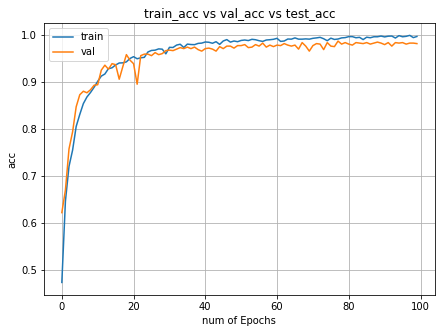

In [27]:
train_acc = cnn_hist.history['acc']
val_acc = cnn_hist.history['val_acc']

plt.figure(1, figsize=(7,5))
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('acc')
plt.title('train_acc vs val_acc vs test_acc')
plt.grid(True)
plt.legend(['train', 'val', 'test'])